In [12]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import nltk
import urllib.request
import matplotlib.pyplot as plt

In [4]:
# read in the data from the webpage
response = urllib.request.urlopen('https://careers.peopleclick.eu.com/careerscp/client_StandardBankGroup/external/jobDetails.do?functionName=getJobDetail&jobPostId=83954&localeCode=en-us&sourceType=PREMIUM_POST_SITE&source=Glassdoor')
html = response.read()
print(html)

b'\n\n\n\n<!DOCTYPE html>\n<html lang="en">\n    <head>\n<meta http-equiv="X-UA-Compatible" content="IE=Edge">\n<meta charset="utf-8">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n\t<meta name="description" content="Standard Bank - Data Scientist - USA NA NA">\n<meta name="author" content="">\n<link rel="shortcut icon" href="https://careers.peopleclick.eu.com/content/live/client_StandardBankGroup/default/images/favicon.png">\n\n<meta http-equiv="Content-Type" content="text/html">\n\n\n\n                <script type="text/javascript">\n                    try {\n                        var _gaq = _gaq || [];\n                            _gaq.push(\n                                [\'sys._setAccount\', \'UA-17542013-2\'],\n                                [\'sys._setCustomVar\', 1, \'Client\', \'standardbankgroup\', 3],\n                                [\'sys._setCustomVar\', 2, \'Site\', \'external\', 3],\n                                [\'sys._setCustomVar\'

In [6]:
#clean the html code
soup = BeautifulSoup(html, features="html.parser")

# kill all script and style elements
for script in soup(["script", "style"]):
    script.extract()    # rip it out

# get text
text = soup.get_text()

# break into lines and remove leading and trailing space on each
lines = (line.strip() for line in text.splitlines())
# break multi-headlines into a line each
chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
# drop blank lines
text = '\n'.join(chunk for chunk in chunks if chunk)

print(text)

Standard Bank - Data Scientist - USA NA NA
Job Details
Data Scientist
Overview
Job ID:
51094
Job Sector:
Banking
Country:
Eswatini
Region/State/Province/District:
Hhohho
Location:
Mbabane
Job Details
Exec & Support, Cross Business Lines
Job Purpose
Apply data mining techniques and conduct statistical analysis to large, structured and unstructured data sets to understand and analyse phenomena.  Model complex business problems, discovering insights and opportunities through statistical, algorithmic, machine learning and visualisation techniques, working closely with clients, data and technology teams to turn data into critical information used to make sound business decisions. Execute intelligent automation and predictive modelling
Key Responsibilities/Accountabilities
Directs the gathering of data for use in Data Science models, ensuring that chosen datasets best reflect the organisations goals. Performs data pre-processing including data manipulation, transformation, normalisation, sta

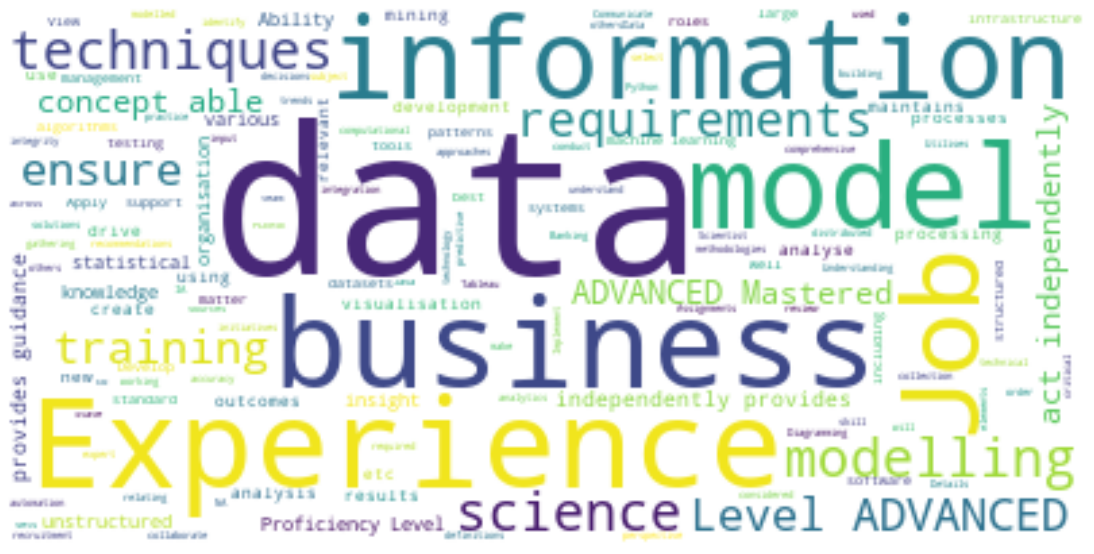

In [10]:
#Generate and display the word cloud for the page based on the text
cloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(15,15), facecolor=None)
plt.imshow(cloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
cloud.to_file('Stanbic.png')

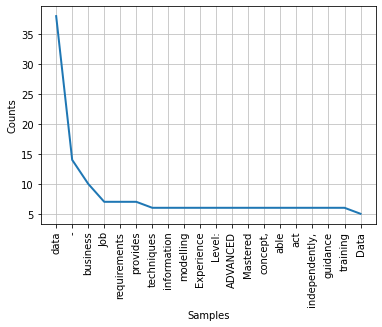

In [15]:
# a frequency plot of the most commonly occuring words
sr = stopwords.words('english')
tokens = [t for t in text.split()]
clean_tokens = tokens[:]
for token in tokens:
    if token in stopwords.words('english'):
        clean_tokens.remove(token)
freq = nltk.FreqDist(clean_tokens)
freq.plot(20, cumulative=False)